# Flu Pattern For Entire Year

In [68]:
library(reshape2)
library(ggplot2)

Chart 1: Influenza National Summary for 2018

In [69]:
ClinicalfluPattern <- read.csv("WHO_NREVSS_Clinical_Labs_2017-2019.csv")
ClinicalfluPattern <- ClinicalfluPattern[c(14:65),]

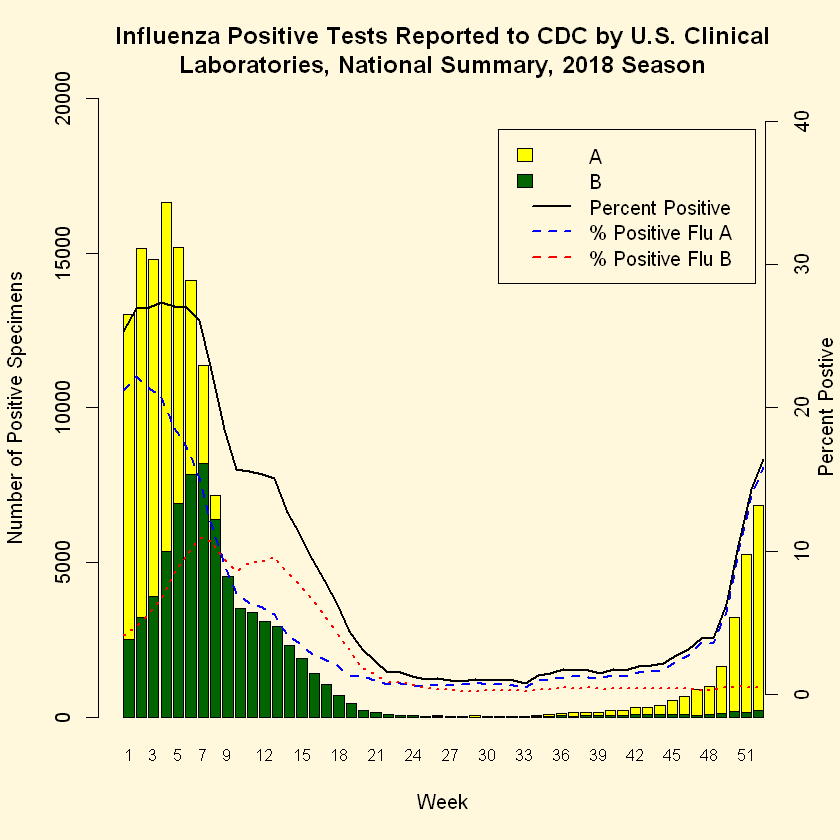

In [70]:
par(bg='cornsilk' )

barplot(ClinicalfluPattern$TOTAL.A, names.arg = ClinicalfluPattern$WEEK, 
        cex.names = 0.8,
        ylim = c(0,20000), col='yellow', xlab="Week", ylab="Number of Positive Specimens", )
par(new = T)
barplot(ClinicalfluPattern$TOTAL.B, ylim = c(0,20000), col='darkgreen')

par(new = T)
#Plot Percent Positive line

plot(ClinicalfluPattern$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 40), axes = F, ann = F)
# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )
lines(ClinicalfluPattern$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(ClinicalfluPattern$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)
title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018 Season")
legend("topright", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), 
       col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA), 
       lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))


Chart 2: Positive Tested 2018

In [71]:
publicHealthFluPattern <- read.csv("WHO_NREVSS_Public_Health_Labs_2017-2019.csv")
publicHealthFluPattern <- publicHealthFluPattern[c(14:65),]

In [74]:
data2 <- data.frame(
    A.Substring = publicHealthFluPattern$A..Subtyping.not.Performed., 
    A.2009 = publicHealthFluPattern$A..2009.H1N1.,
    A.H3 = publicHealthFluPattern$A..H3., 
    H3N2v = publicHealthFluPattern$H3N2v, 
    B = publicHealthFluPattern$B,
    BVic = publicHealthFluPattern$BVic, 
    B.Yam = publicHealthFluPattern$BYam,
  row.names = publicHealthFluPattern$WEEK
)

data2$Week <- c(1:52)

mdata2 <- melt(data2, id.vars = "Week")

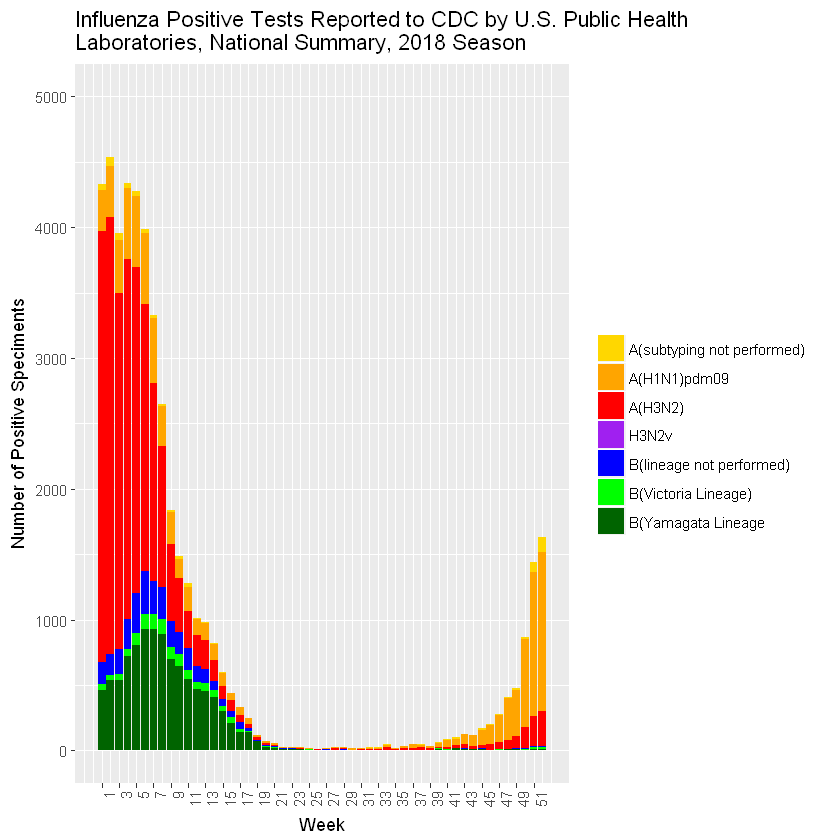

In [75]:
legendLabel = c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)", "H3N2v",
                "B(lineage not performed)", "B(Victoria Lineage)", "B(Yamagata Lineage")
color = c("gold","orange", "red", "purple", "blue", "green", "darkgreen")
positiveTest2018 <- ggplot(mdata2, aes(x = mdata2$Week, y = value, fill = variable)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2018 Season", 
    y = "Number of Positive Speciments", x = "Week") + 
    scale_fill_manual(labels = legendLabel, values = color) +
    geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_y_continuous(limits = c(0,5000)) + 
    scale_x_continuous(breaks = seq(1,52,2)) +
    guides (fill = guide_legend(title = "")) 
positiveTest2018